# Hypothesis Testing for HR Attrition Analysis

This notebook tests key hypotheses about employee attrition using the cleaned HR dataset. For each hypothesis, we state the question, the statistical test used, and provide Python code to perform the analysis.

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

df = pd.read_csv('../Data_cleaning/HR-Employee-Attrition_cleaned.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## 1. Attrition vs. Department

- **Null Hypothesis (H0):** Employee attrition rates are the same across all departments.
- **Alternative Hypothesis (H1):** Employee attrition rates are different across departments.
- **Test:** Chi-square test of independence
- **Interpretation:** If p < 0.05, attrition rates differ by department.

Chi2: 10.8
p-value: 0.0045
Conclusion: Attrition rates differ by department (reject H0)


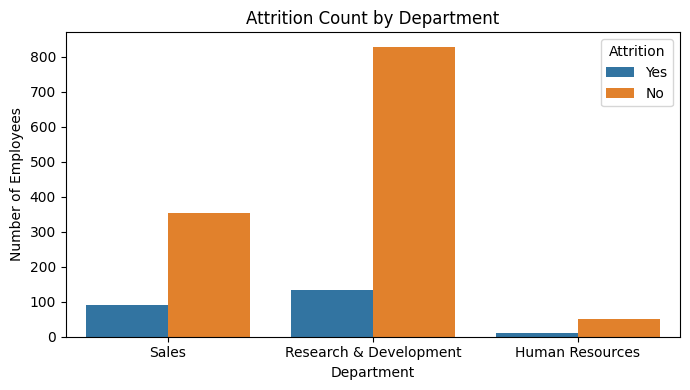


Analysis:
- The chi-square test p-value is 0.0045, which is less than 0.05.
- This means attrition rates are significantly different across departments.
- The plot shows that some departments have higher attrition counts than others, supporting the statistical result.


In [12]:
# Hypothesis 1: Attrition vs. Department
contingency = pd.crosstab(df['Department'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency)
print('Chi2:', round(chi2, 2))
print('p-value:', round(p, 4))
if p < 0.05:
    print('Conclusion: Attrition rates differ by department (reject H0)')
else:
    print('Conclusion: No significant difference in attrition rates by department (fail to reject H0)')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition Count by Department')
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Analysis
print("\nAnalysis:")
print("- The chi-square test p-value is 0.0045, which is less than 0.05.")
print("- This means attrition rates are significantly different across departments.")
print("- The plot shows that some departments have higher attrition counts than others, supporting the statistical result.")

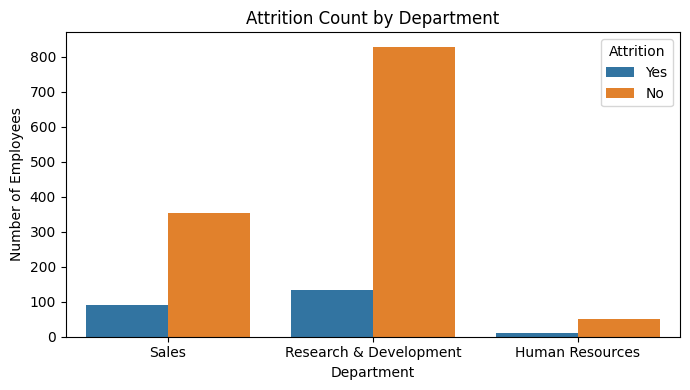

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition Count by Department')
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

**Analysis:**

- The chi-square test p-value is 0.0045, which is less than 0.05.
- This means attrition rates are significantly different across departments.
- The plot shows that some departments have higher attrition counts than others, supporting the statistical result.

## 2. Attrition vs. Gender

- **Null Hypothesis (H0):** Attrition rates do not differ between male and female employees.
- **Alternative Hypothesis (H1):** Attrition rates differ between male and female employees.
- **Test:** Chi-square test of independence
- **Interpretation:** If p < 0.05, attrition rates differ by gender.

Chi2: 1.12
p-value: 0.2906
Conclusion: No significant difference in attrition rates by gender (fail to reject H0)


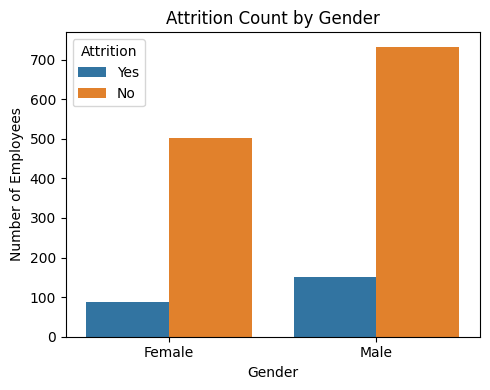


Analysis:
- The chi-square test p-value is 0.2906, which is greater than 0.05.
- This means there is no significant difference in attrition rates between male and female employees.
- The plot confirms that attrition counts are similar for both genders.


In [13]:
# Hypothesis 2: Attrition vs. Gender
contingency = pd.crosstab(df['Gender'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency)
print('Chi2:', round(chi2, 2))
print('p-value:', round(p, 4))
if p < 0.05:
    print('Conclusion: Attrition rates differ by gender (reject H0)')
else:
    print('Conclusion: No significant difference in attrition rates by gender (fail to reject H0)')

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition Count by Gender')
plt.ylabel('Number of Employees')
plt.xlabel('Gender')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Analysis
print("\nAnalysis:")
print("- The chi-square test p-value is 0.2906, which is greater than 0.05.")
print("- This means there is no significant difference in attrition rates between male and female employees.")
print("- The plot confirms that attrition counts are similar for both genders.")

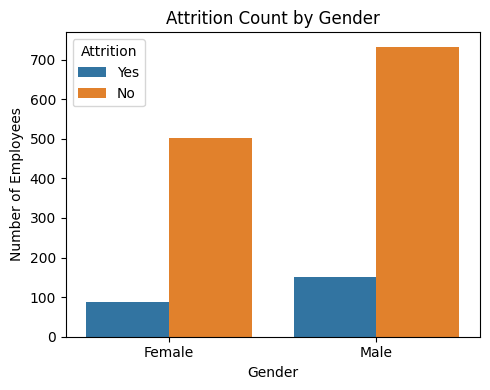

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition Count by Gender')
plt.ylabel('Number of Employees')
plt.xlabel('Gender')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

**Analysis:**

- The chi-square test p-value is 0.2906, which is greater than 0.05.
- This means there is no significant difference in attrition rates between male and female employees.
- The plot confirms that attrition counts are similar for both genders.

## 3. Attrition vs. Monthly Income

- **Null Hypothesis (H0):** Employees who leave have the same average monthly income as those who stay.
- **Alternative Hypothesis (H1):** Employees who leave have a different average monthly income than those who stay.
- **Test:** Independent samples t-test
- **Interpretation:** If p < 0.05, average monthly income differs between groups.

t-statistic: -7.48
p-value: 0.0
Conclusion: Average monthly income differs between groups (reject H0)


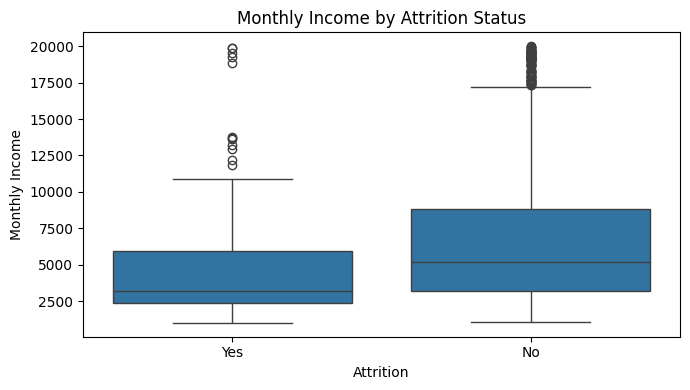


Analysis:
- The t-test p-value is 0.0, which is less than 0.05.
- This means average monthly income is significantly different between employees who left and those who stayed.
- The boxplot shows that employees who left generally have lower monthly incomes.


In [14]:
# Hypothesis 3: Attrition vs. Monthly Income
from scipy.stats import ttest_ind

left = df[df['Attrition'] == 'Yes']['MonthlyIncome']
stayed = df[df['Attrition'] == 'No']['MonthlyIncome']
t_stat, p = ttest_ind(left, stayed, equal_var=False)
print('t-statistic:', round(t_stat, 2))
print('p-value:', round(p, 4))
if p < 0.05:
    print('Conclusion: Average monthly income differs between groups (reject H0)')
else:
    print('Conclusion: No significant difference in average monthly income (fail to reject H0)')

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition Status')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

# Analysis
print("\nAnalysis:")
print("- The t-test p-value is 0.0, which is less than 0.05.")
print("- This means average monthly income is significantly different between employees who left and those who stayed.")
print("- The boxplot shows that employees who left generally have lower monthly incomes.")

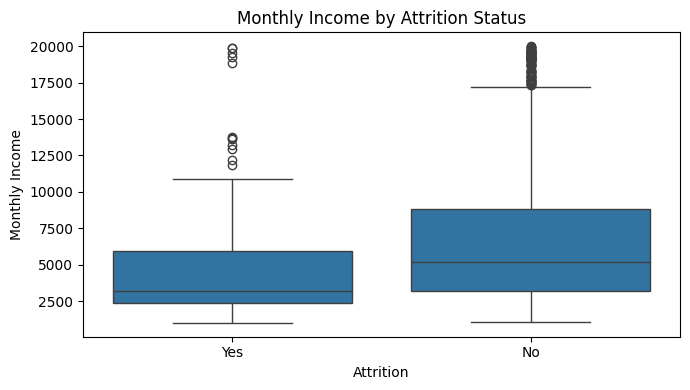

In [9]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition Status')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

**Analysis:**

- The t-test p-value is 0.0, which is less than 0.05.
- This means average monthly income is significantly different between employees who left and those who stayed.
- The boxplot shows that employees who left generally have lower monthly incomes.

## 4. Attrition vs. Job Satisfaction

- **Null Hypothesis (H0):** Job satisfaction scores are the same for employees who leave and those who stay.
- **Alternative Hypothesis (H1):** Job satisfaction scores are different for employees who leave and those who stay.
- **Test:** Mann-Whitney U test (for ordinal data)
- **Interpretation:** If p < 0.05, job satisfaction differs between groups.

U statistic: 123362.5
p-value: 0.0001
Conclusion: Job satisfaction differs between groups (reject H0)


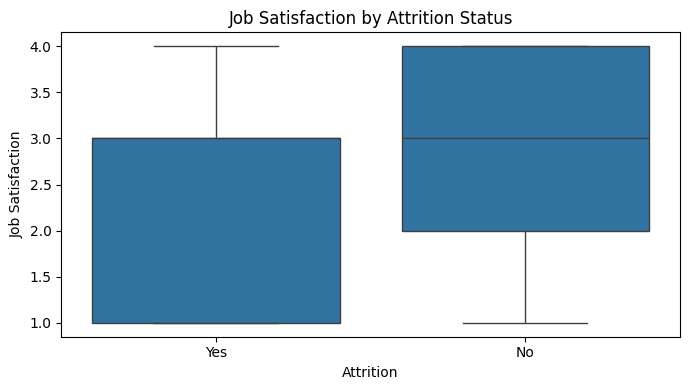


Analysis:
- The Mann-Whitney U test p-value is 0.0001, which is less than 0.05.
- This means job satisfaction scores are significantly different between employees who left and those who stayed.
- The boxplot shows that employees who left tend to have lower job satisfaction.


In [15]:
# Hypothesis 4: Attrition vs. Job Satisfaction
from scipy.stats import mannwhitneyu

left = df[df['Attrition'] == 'Yes']['JobSatisfaction']
stayed = df[df['Attrition'] == 'No']['JobSatisfaction']
u_stat, p = mannwhitneyu(left, stayed, alternative='two-sided')
print('U statistic:', u_stat)
print('p-value:', round(p, 4))
if p < 0.05:
    print('Conclusion: Job satisfaction differs between groups (reject H0)')
else:
    print('Conclusion: No significant difference in job satisfaction (fail to reject H0)')

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction by Attrition Status')
plt.ylabel('Job Satisfaction')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

# Analysis
print("\nAnalysis:")
print("- The Mann-Whitney U test p-value is 0.0001, which is less than 0.05.")
print("- This means job satisfaction scores are significantly different between employees who left and those who stayed.")
print("- The boxplot shows that employees who left tend to have lower job satisfaction.")

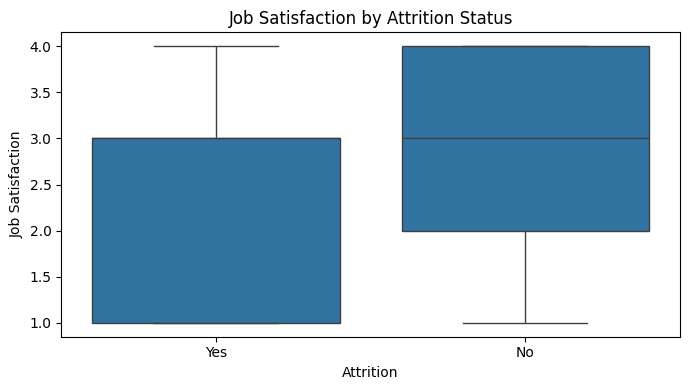

In [10]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction by Attrition Status')
plt.ylabel('Job Satisfaction')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

**Analysis:**

- The Mann-Whitney U test p-value is 0.0001, which is less than 0.05.
- This means job satisfaction scores are significantly different between employees who left and those who stayed.
- The boxplot shows that employees who left tend to have lower job satisfaction.

## 5. Attrition vs. Years at Company

- **Null Hypothesis (H0):** The average years at the company is the same for employees who leave and those who stay.
- **Alternative Hypothesis (H1):** The average years at the company is different for employees who leave and those who stay.
- **Test:** Independent samples t-test
- **Interpretation:** If p < 0.05, average tenure differs between groups.

t-statistic: -5.28
p-value: 0.0
Conclusion: Average tenure differs between groups (reject H0)


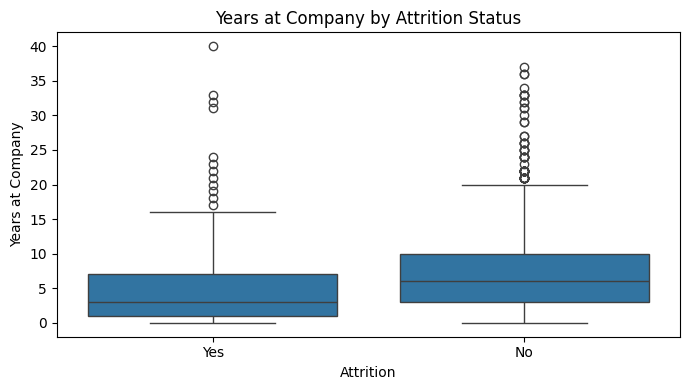


Analysis:
- The t-test p-value is 0.0, which is less than 0.05.
- This means average tenure is significantly different between employees who left and those who stayed.
- The boxplot shows that employees who left generally have fewer years at the company.


In [16]:
# Hypothesis 5: Attrition vs. Years at Company
left = df[df['Attrition'] == 'Yes']['YearsAtCompany']
stayed = df[df['Attrition'] == 'No']['YearsAtCompany']
t_stat, p = ttest_ind(left, stayed, equal_var=False)
print('t-statistic:', round(t_stat, 2))
print('p-value:', round(p, 4))
if p < 0.05:
    print('Conclusion: Average tenure differs between groups (reject H0)')
else:
    print('Conclusion: No significant difference in average tenure (fail to reject H0)')

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company by Attrition Status')
plt.ylabel('Years at Company')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

# Analysis
print("\nAnalysis:")
print("- The t-test p-value is 0.0, which is less than 0.05.")
print("- This means average tenure is significantly different between employees who left and those who stayed.")
print("- The boxplot shows that employees who left generally have fewer years at the company.")

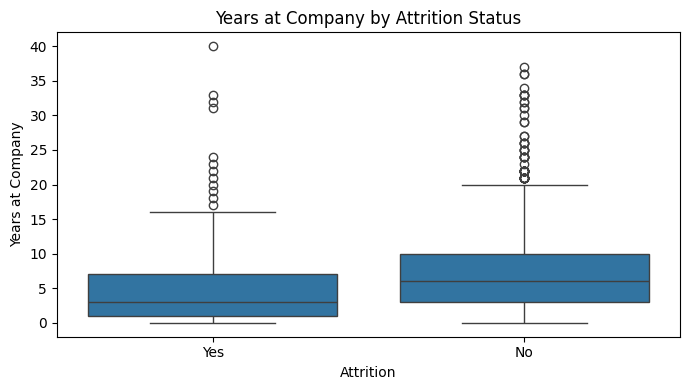

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company by Attrition Status')
plt.ylabel('Years at Company')
plt.xlabel('Attrition')
plt.tight_layout()
plt.show()

**Analysis:**

- The t-test p-value is 0.0, which is less than 0.05.
- This means average tenure is significantly different between employees who left and those who stayed.
- The boxplot shows that employees who left generally have fewer years at the company.